# Tarea #2: Los buenos ejemplos se copian

Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ellos nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

## Problema 1: Behavioural finance

In [48]:
from IPython.display import Image

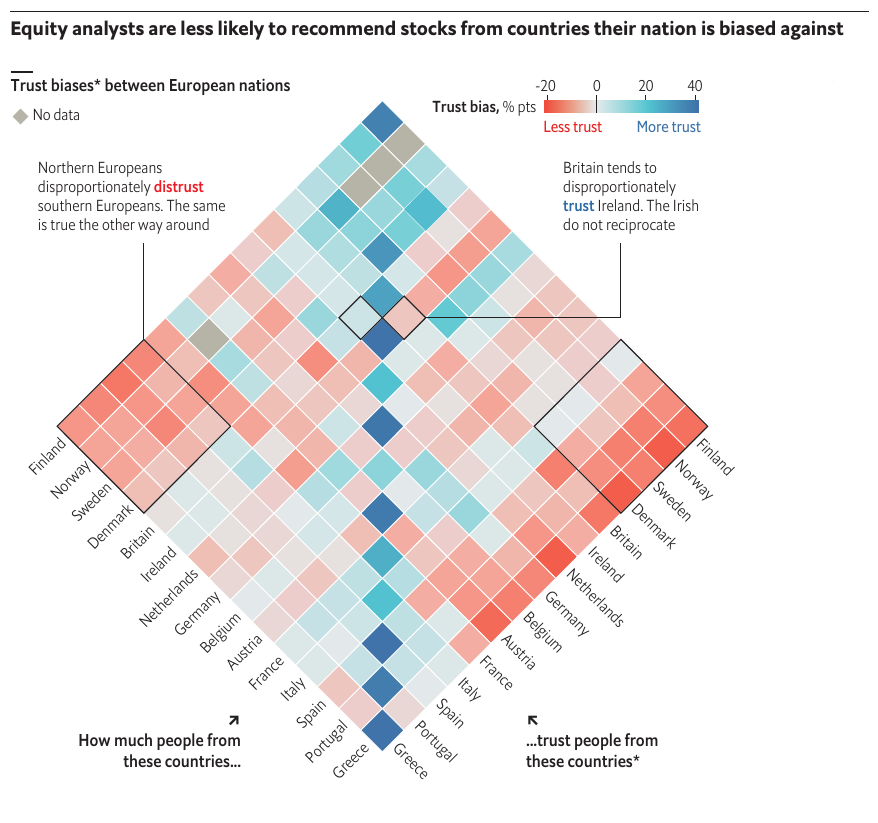

In [49]:
Image("./images/01-behavioural-finance.png")

### Datos

Los datos fueron sacados de [este paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3153900) (Table IA.I). Como la idea de esta tarea no es enfocarse en la extracción de datos, el archivo `csv` con los datos de la tabla ya son entregados en `data/01-behavioural-finance.csv`

### Ayuda 1

[Esta herramienta](https://eltos.github.io/gradient/) puede ser sumamente útil para extraer la paleta de colores y crear un colormap con esos valores. Una vez que se han elegido los colores, la paleta puede ser cargada de la siguiente forma

In [50]:
from matplotlib.colors import LinearSegmentedColormap

my_gradient = LinearSegmentedColormap.from_list('my_gradient', ( 
    (0.000, (0.941, 0.302, 0.239)),
    (0.333, (0.890, 0.914, 0.922)),
    (0.666, (0.353, 0.780, 0.820)),
    (1.000, (0.247, 0.436, 0.671))))

### Ayuda 2

Una de las partes más difíciles de esta tarea puede ser rotar el gráfico. Como la idea de la tarea es ejercitar otro tipo de habilidades, aquí se entrega una función que permitirá rotar el gráfico.

In [104]:
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext

In [52]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df.shape[0],0, df.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

Abajo se da un ejemplo de cómo utilizar la función dado un dataframe `df`. De ahí en adelante, el axis que se modifica es `ax0`.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib import lines
from matplotlib import patches

In [54]:
df = pd.read_csv(r".\data\01-behavioural-finance.csv", index_col=0)
df.head()
ordered_columns = ['Fin','Nor','Swe','Den','UK','Ire','NL','Ger','Bel','Aus','Fra','Ita','Spa','Por','Gre']
nombres = ['Finland','Norway','Sweden','Denmark','Britain','Ireland','Netherlands','Germany','Belgium','Austria','France','Italy','Spain','Portugal','Greece']
df1=df[ordered_columns]
df1 = df1.reindex(ordered_columns) #reindex mueve los valores segun la lista


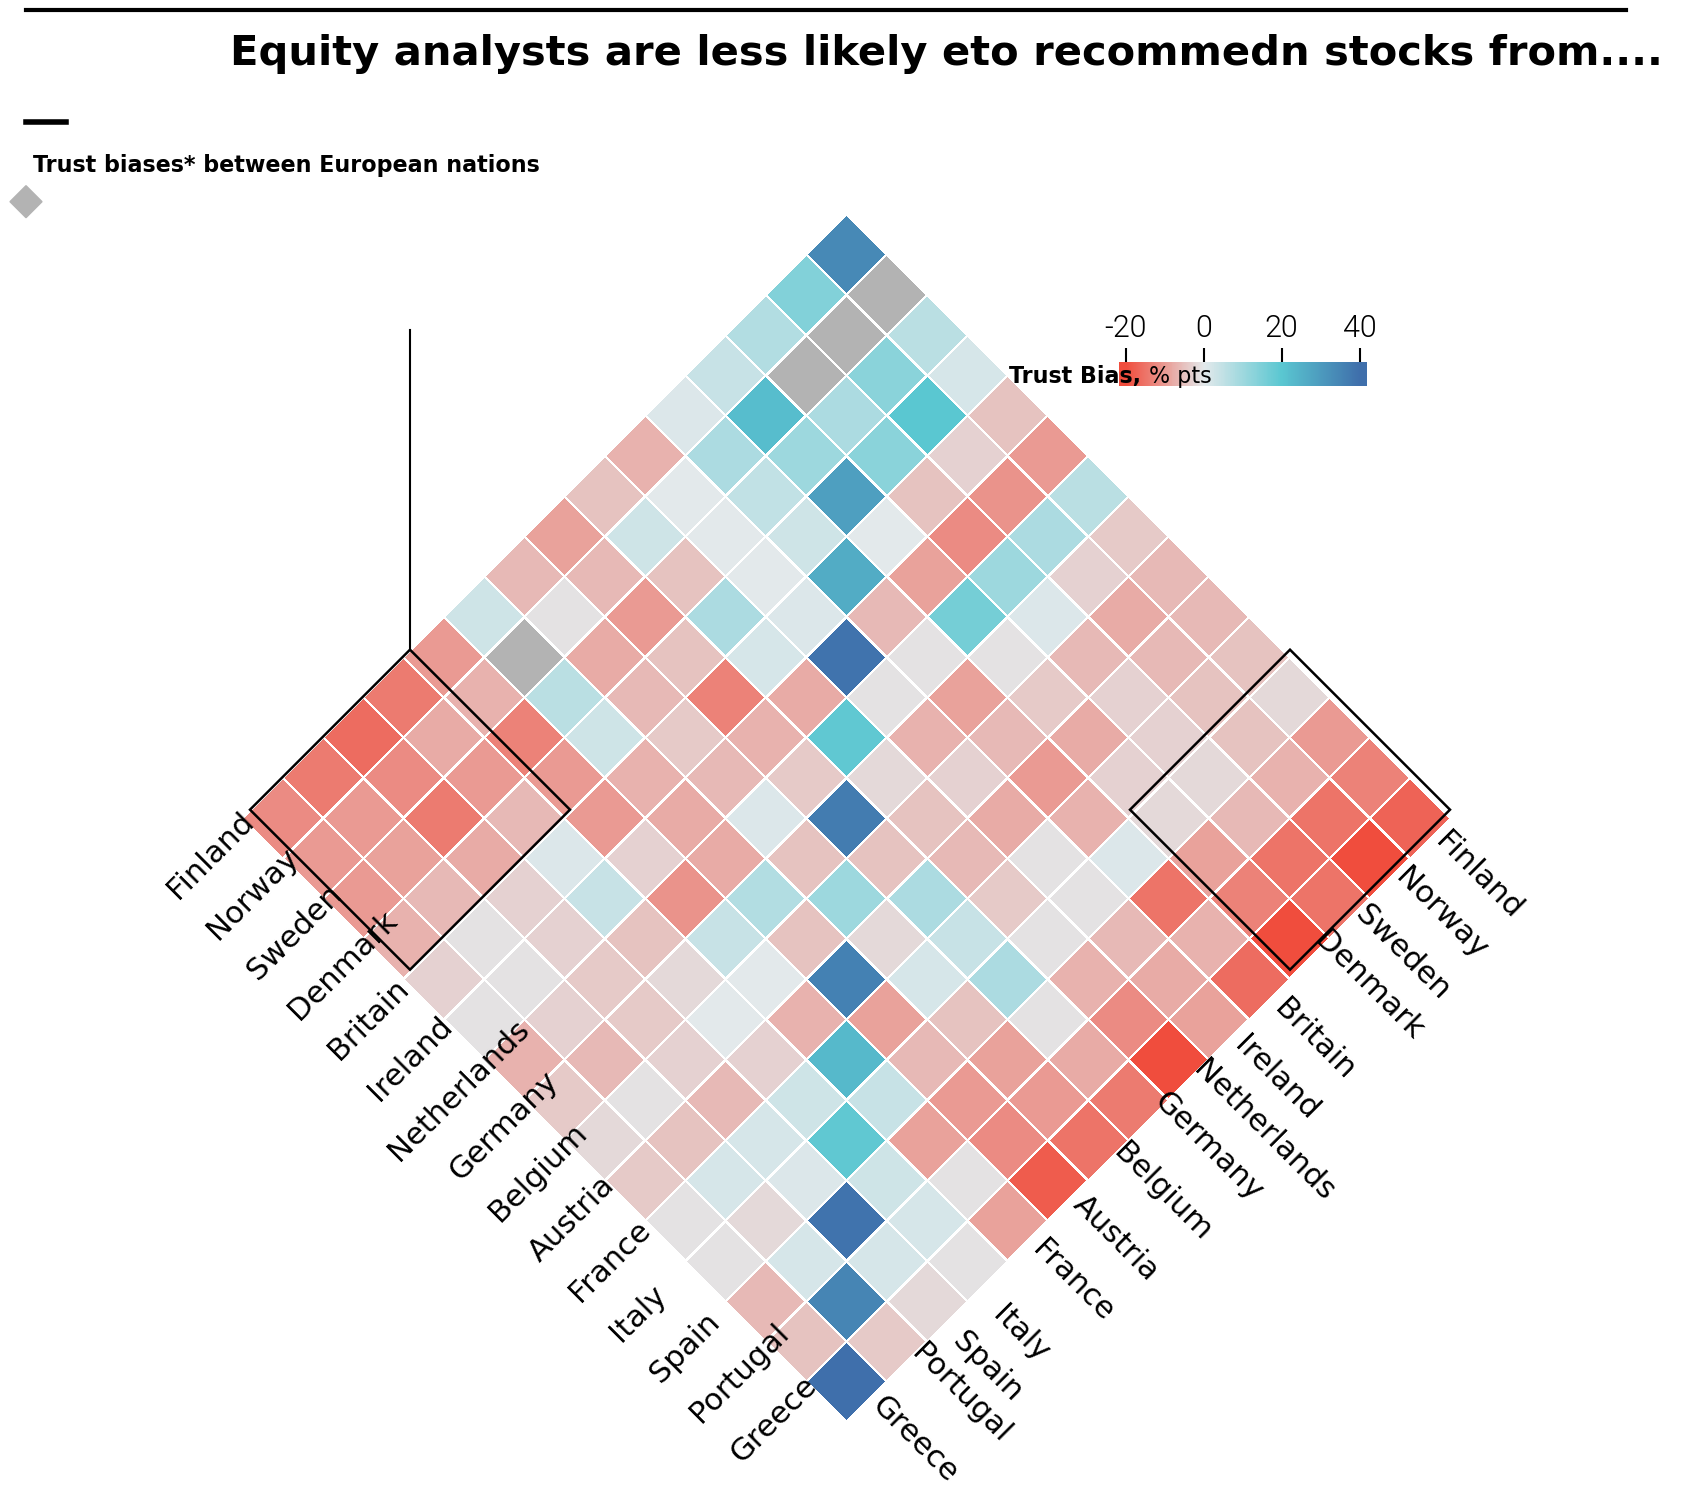

In [256]:
# Para que esta celda pueda correr hay que definir df, crear el colormap my_gradient e importar sns

fig, ax = plt.subplots(1,1, figsize=(16, 16))

ax0 = rotate_axes(fig, 111,225)

axheat = sns.heatmap(df1, cmap=my_gradient, ax=ax0, linecolor='w',lw=1, cbar=False)
ax.set_axis_off()

axheat.collections[0].cmap.set_bad('.7') #hacer nan gris

#barra de colores
axcb = fig.colorbar(ScalarMappable(cmap=my_gradient), ax=ax,orientation='horizontal',
                  location='top',
                  shrink=0.2,
                  aspect=10,
                  anchor=(0.9,0),
                  extend="both",
                  extendrect=True,
                  extendfrac=0.03,
                  drawedges=False
                  ) 
axcb.outline.set_visible(False) #remover el borde del mapa de color
axcb.set_ticks(ticks=[0, 0.333, 0.666, 1],labels=["-20","0","20","40"], 
               fontsize=22, fontfamily='Roboto', weight=300)
axcb.ax.tick_params(length=10, width=1.5)
#texto barra colores
text = "<weight:bold, size:16>Trust Bias, </><weight:300, size:16>% pts</>"
flexitext(-0.5, 0.4, text, ha="left",ax=axcb.ax);
#texto rojo y azul
#----

#Linea top
fig.add_artist(lines.Line2D([0,1],[1,1],lw=3,color='k') )
#texto linea top
text = "<weight:bold, size:30, color:black>Equity analysts are less likely eto recommedn stocks from.... </>"
flexitext(0, 1.12, text, ha="left");
#linea chica
fig.add_artist(lines.Line2D([0,0.025],[0.93,0.93],lw=4,color='k'))
text = "<weight:bold, size:16>Trust biases* between European nations</>"
#texto linea chica
flexitext(-.16, 1.03, text, ha="left");
#rombo gris
fig.add_artist(patches.RegularPolygon(xy=(0,0.88),radius=0.01,numVertices=4,color='0.7'))
#texto rombo
#texto NE
    #texto rojo

#texto rombos ire bri
    #texto colores
#rombos NE
fig.add_artist(patches.RegularPolygon(xy=(0.24,0.5),radius=0.10,numVertices=4,color='k',fill=False, lw=1.8))
fig.add_artist(lines.Line2D([0.24,0.24],[0.60,0.8],color='k'))

fig.add_artist(patches.RegularPolygon(xy=(0.79,.5),radius=0.10,numVertices=4,color='k',fill=False, lw=1.8))
#linea rombo NE

#rombos ire bri
#lineas rombo ire bri
#columna pais izq
#columna pais der
#flecha izq
#flecha der
#texto final izq
for i in range(len(ordered_columns)):
    if i == 6: continue
    axheat.text(x=17,y=i,s=nombres[i],size=22,weight=100, rotation=45, ha='left')
axheat.text(x=17.5,y=6,s=nombres[6],size=22,weight=100, rotation=45, ha='left')
#texto final der
for i in range(len(ordered_columns)):
    if i == 6: continue
    axheat.text(x=i+1.5,y=16,s=nombres[i],size=22,weight=100, rotation=315, ha='left')
axheat.text(x=6+2,y=16.5,s=nombres[6],size=22,weight=100, rotation=315, ha='left')


plt.show()

## Problema 2: Happiness economics

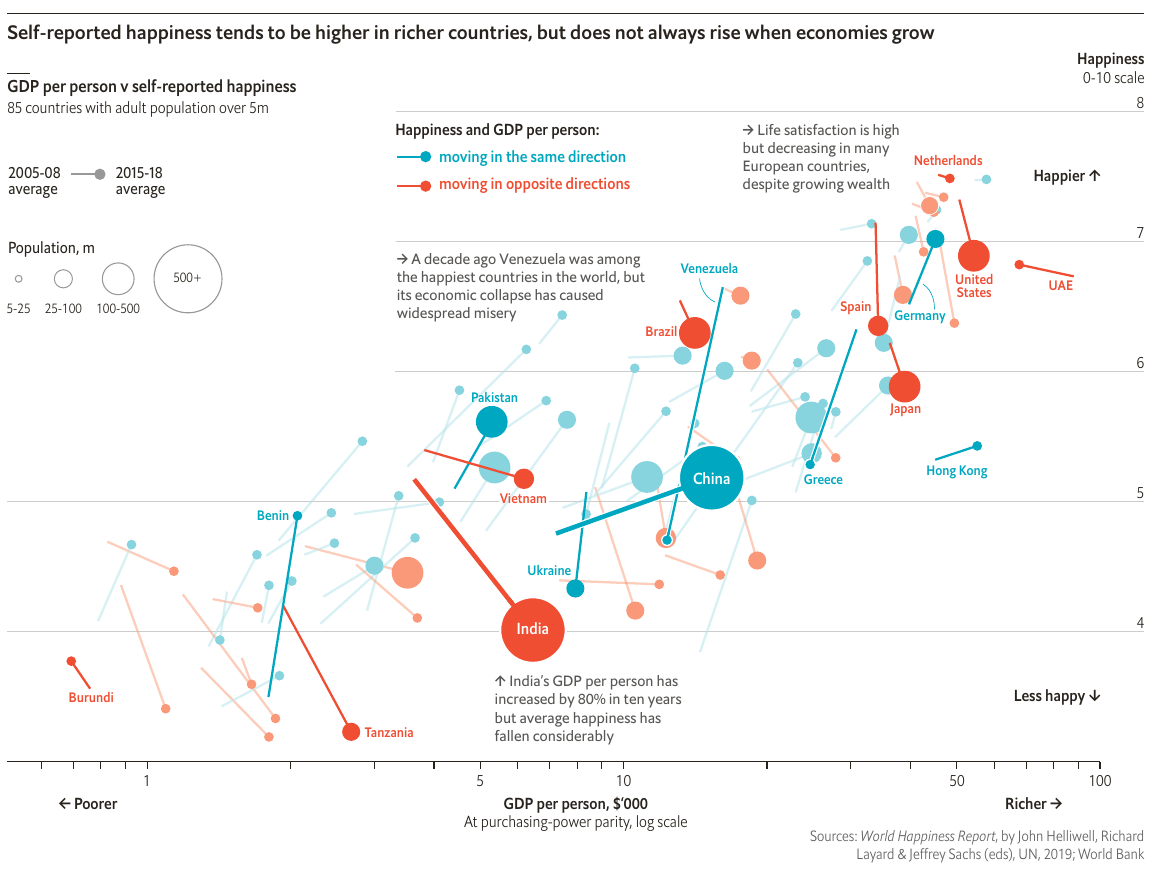

In [31]:
Image("./images/02-happiness-economics.png")

### Datos

El equipo del The Economist publicaron su código para la extracción y procesamiento de datos en [su GitHub](https://github.com/TheEconomist/graphic-detail-data/tree/master/data/2019-03-23_happiness-economics). De hecho, el código para hacer el gráfico también está incluido, pero -lamentablemente para ustedes- usan R en vez de Python. Los datos ya han sido bajados y compilados, los cuales se ubican en `data/02-happiness-economics.csv`

### Ayuda 1

Si se dan cuenta, hay datos para un total de 125 países en el archivo `csv`, pero en el gráfico solo hay 85. Si se fijan bien en [la metodologia publicada](https://github.com/TheEconomist/graphic-detail-data/blob/master/data/2019-03-23_happiness-economics/README.Rmd#L160), el The Economist selecciona los países con una población de más de 5 millones de personas en el año 2018 para graficarlos (de ahí que sean menos).

### Ayuda 2

El color de cada círculo está relacionado al valor de la columna `paradox`.

In [32]:
#scatter
    #paises resaltados
    #nombres paises resaltaos
#lineas scatter
#grid
#escala log
#linea negra top
#texto top
#mini linea
#texto mini linea
#texto sub mini linea
#leyenda
#leyenda 2
#texto venezuela
#texto euro
#texto india
#label eje y
#label eje x *3
#sublabel eje x
#fuente

